In [1]:
#Lineer Regresyon

In [2]:
"""
y = b0 + b1x
y : response, target (hedef) variable
x : feature (özellik)
b1 : coefficient
b0 : intercept
"""

'\ny = b0 + b1x\ny : response, target (hedef) variable\nx : feature (özellik)\nb1 : coefficient\nb0 : intercept\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
dataset = pd.read_csv('data/Salary_Data.csv')

In [7]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
dataset.shape

(30, 2)

In [10]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [11]:
"""
Train: %70-%80
Validation: in Train OR instead of Test
Test: %20-%30
"""

'\nTrain: %70-%80\nValidation: in Train OR instead of Test\nTest: %20-%30\n'

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

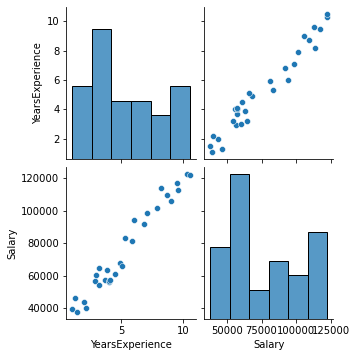

In [14]:
sns.pairplot(dataset)

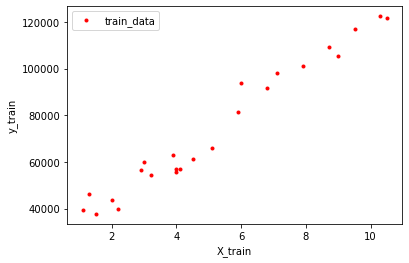

In [15]:
plt.plot(X_train, y_train, 'r.', label = 'train_data')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

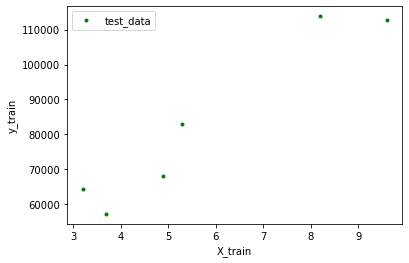

In [16]:
plt.plot(X_test, y_test, 'g.', label = 'test_data')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(X_test).round(1)

In [20]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ["Original Salary", "Predicted Salary"])
hesaplama

,Original Salary,Predicted Salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


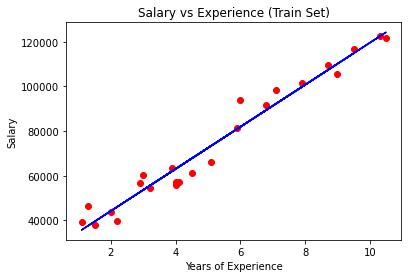

In [21]:
#Training set
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Train Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

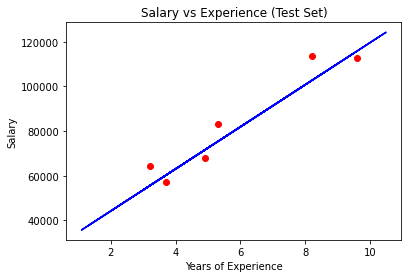

In [22]:
#Test set
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [23]:
#Polynomial Linear Regression

In [24]:
#y = a + bx + cx^2 + ... + nx^n + ...

In [25]:
dataset = pd.read_csv('data/Position_Salaries.csv')

In [26]:
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [27]:
dataset = dataset.drop(['Position'], axis = True)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


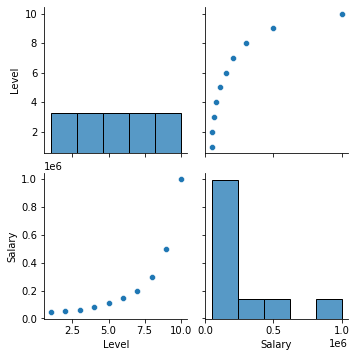

In [29]:
sns.pairplot(dataset)

In [30]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
print("Training Accuracy : ", lin_reg.score(X_train, y_train))
print("Testing Accuracy : ", lin_reg.score(X_test, y_test))

Training Accuracy :  0.6366049276570868
Testing Accuracy :  0.8451346684575975


In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [52]:
X_poly_test = poly_reg.transform(X_test)

In [53]:
print("Training Accuracy :", lin_reg_2.score(X_poly, y_train))
print("Testing Accuracy :", lin_reg_2.score(X_poly_test, y_test))

Training Accuracy : 0.9995857211026754
Testing Accuracy : 0.9714666803841844


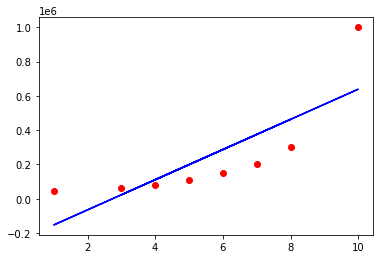

In [54]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.show()

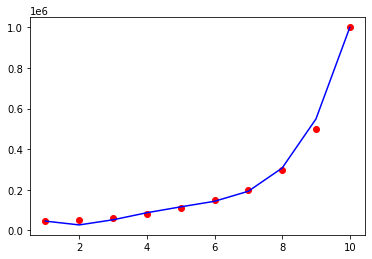

In [61]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

In [62]:
#Multiple Linear Regression

In [63]:
"""
y = b0 + b1*x1 + b2*x2 + bn*xn
"""

'\ny = b0 + b1*x1 + b2*x2 + bn*xn\n'

In [64]:
dataset = pd.read_csv('data/50_Startups.csv')

In [65]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [66]:
dataset.shape

(50, 5)

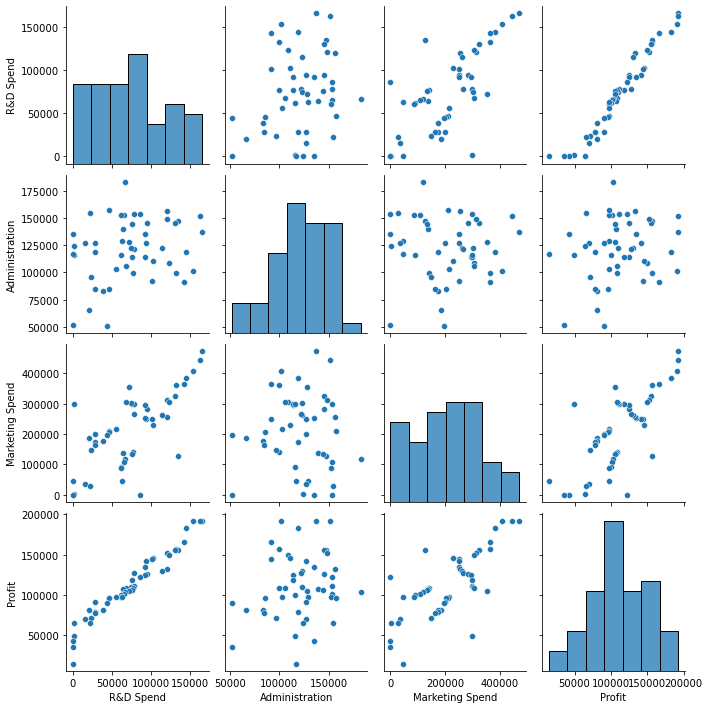

In [67]:
sns.pairplot(dataset)

<AxesSubplot:>

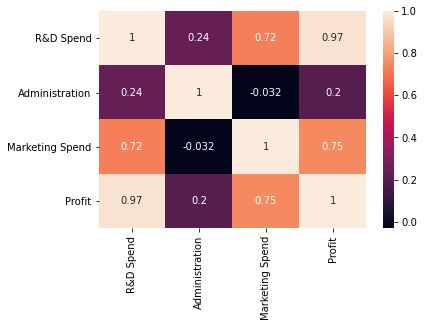

In [68]:
corr = dataset.corr()
sns.heatmap(corr, annot = True)

In [69]:
dataset = dataset.drop('State', axis = True)

In [70]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [71]:
X = dataset.drop('Profit', axis = True)
y = dataset['Profit']

In [72]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [73]:
#StandardScaler, MinMaxScaler

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [75]:
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = regressor.predict(X_test).round(1)

In [82]:
hesaplama2 = pd.DataFrame(np.c_[y_test, y_pred], columns = ["Original Profit", "Predicted Profit"])
hesaplama2.head(5)

,Original Profit,Predicted Profit
0,134307.35,126703.0
1,81005.76,84894.8
2,99937.59,98893.4
3,64926.08,46501.7
4,125370.37,129128.4


In [83]:
print("Training Accuracy :", regressor.score(X_train, y_train))
print("Testing Accuracy :", regressor.score(X_test, y_test))

Training Accuracy : 0.9535927757257411
Testing Accuracy : 0.900065308303732


In [84]:
#165349.20, 136897.80, 471784.10

In [85]:
feature = [165349.20, 136897.80, 471784.10]
scale_feature = sc.transform([feature])
scale_feature

array([[2.01641149, 0.56075291, 2.15394309]])

In [86]:
y_pred_test = regressor.predict(scale_feature)
y_pred_test

array([192416.0460853])

In [87]:
"""
y = b0 + b1*x1 + b2*x2 + b3*x3 
"""

'\ny = b0 + b1*x1 + b2*x2 + b3*x3 \n'

In [88]:
regressor.coef_  #b1, b2, b3

array([36524.46619483, -1884.09781154,  3782.14001043])

In [89]:
regressor.intercept_ #b0

111677.69167216848

In [1]:
#Gradient Descent

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [3]:
cols = ['a', 'b']
data = pd.read_csv('data/data.csv', header = None, names = cols)

In [4]:
data.head()

,a,b
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [5]:
x = data.drop('b', axis = 1)
y = data['b']

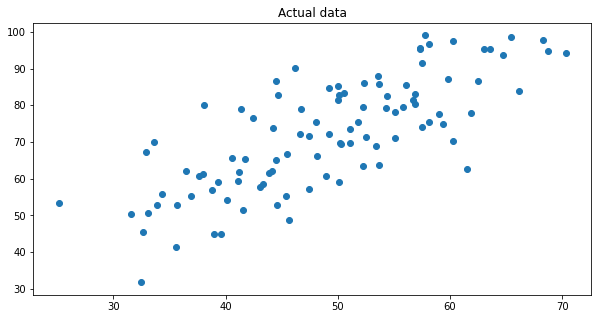

In [6]:
plt.scatter(x, y)
plt.title('Actual data')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [8]:
y_pred_lr = lr.predict(x)

In [9]:
print("Intercept is", lr.intercept_)
print("Coefficient is", lr.coef_[0])

Intercept is 13.642154681481571
Coefficient is 1.1927057602312432


In [10]:
#Gradyan İniş Kullanılırsa
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

In [11]:
m = 0 #Intercept
c = 0 #Coefficient

L = 0.0001 #learning rate
epochs = 1000

n = float(len(X))

for i in range(epochs):
    Y_pred = m * X + c 
    D_m = (-2/n) * sum(X * (Y - Y_pred))
    D_c = (-2/n) * sum(Y - Y_pred)
    m = m - L * D_m
    c = c - L * D_c
    
print("Intercept is", m)
print("Coefficient is", c)

Intercept is 1.4582620978635645
Coefficient is 0.13106568099591231


----------------Gradyan İniş Olmadan LR---------------


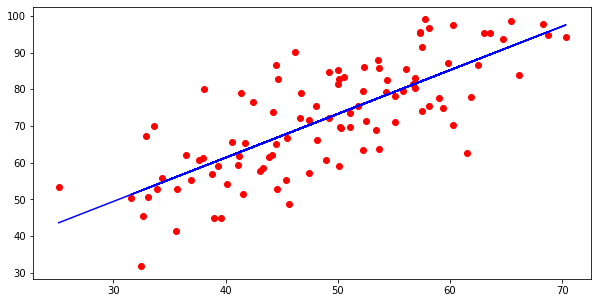

---------------Gradyan İniş ile LR--------------------


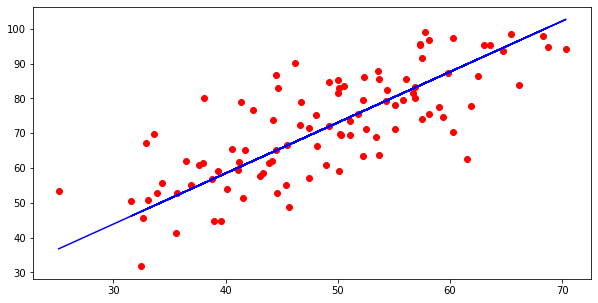

In [12]:
print("----------------Gradyan İniş Olmadan LR---------------")
plt.scatter(x, y, color = 'red')
plt.plot(x, lr.predict(x), color = 'blue')
plt.show()

print("---------------Gradyan İniş ile LR--------------------")
plt.scatter(X, Y, color = 'red')
plt.plot(X, Y_pred, color = 'blue')
plt.show()

In [13]:
#Logistic Regression

In [14]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [15]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')

In [16]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
X = dataset.drop(['Purchased', 'User ID', 'Gender'], axis = 1)
y = dataset['Purchased']

In [18]:
X.shape, y.shape

((400, 2), (400,))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1.0)
classifier.fit(X_train, y_train)

LogisticRegression()

In [22]:
#Regularization (Düzenlileştirme)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
calculation = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Purchased', 'Predicted Purchased'])
calculation

,Original Purchased,Predicted Purchased
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


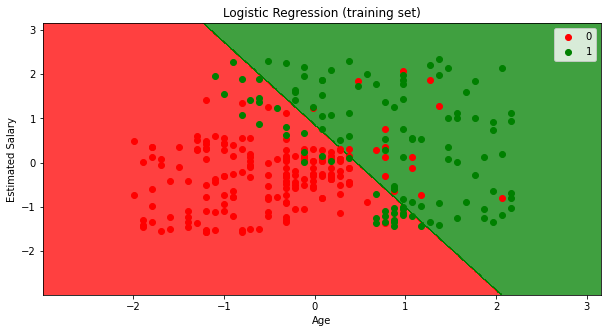

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


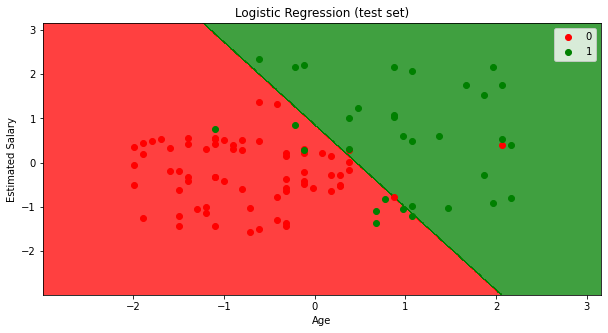

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [27]:
#Confusion Matrix (Karmaşıklık Matrisi)

In [28]:
"""
                                Actual
  
                         "1"               "0"
 
              "1"   True Positive(TP)    False Positive(FP)
 
Predicted   
 
              "0"   False Negative(FN)   True Negative(TN)

"""                      

'\n                                Actual\n  \n                         "1"               "0"\n \n              "1"   True Positive(TP)    False Positive(FP)\n \nPredicted   \n \n              "0"   False Negative(FN)   True Negative(TN)\n\n'

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
#Accuracy (Başarım, Doğruluk)
"""  
[[73 7]]
 [4  144]]
 
 
Accuracy = (TP + TN) / (TP + FP + FN + TN) ==> 217 / 228 = 0,9517

"""

#Precision (Keskinlik)

"""

Precision = TP / (TP + FP) ==> 73 / 80 = 0,9125

"""

#Recall, Sensitivity (Hatırlama, Hassasiyet)
"""

Recall = TP / (TP + FN) ==> 73 / 77 = 0.948

"""

'\n\nRecall = TP / (TP + FN) ==> 73 / 77 = 0.948\n\n'

In [32]:
#Destek Vektör Makinaları (Support Vector Machines)

In [33]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


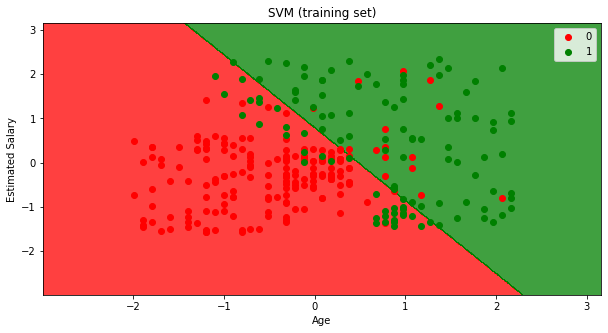

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('SVM (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


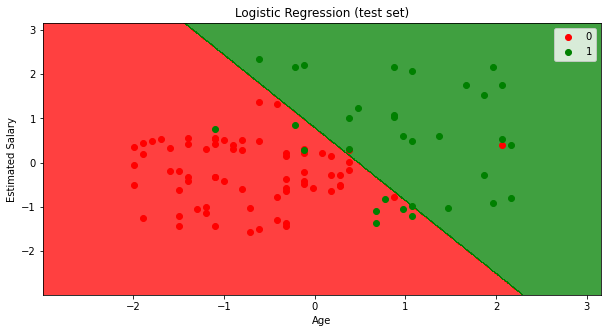

In [40]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()